In [ ]:
# Importar las librerias
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import spacy, nltk

In [ ]:
# Cargar un modelo en español preentrenado
nlp = spacy.load("es_core_news_md")

In [3]:
# Cargar los datos
df = pd.read_csv("../Data/dataset_groom.csv")

In [4]:
# Visualizar datos
#for i in range(len(df['Groom'].values)):
#    int(df['Groom'][i])

df['Groom'] = df['Groom'].values.astype('int')

In [5]:
df.drop_duplicates()
df.dropna()

,Text,Groom
0,"por lo tanto, no hay forma de que lo conectes ...",0
1,buen estuche excelente relación calidad-precio,0
2,para la mandíbula,0
3,vinculado al cargador para conversaciones que ...,0
4,el micrófono es genial,0
...,...,...
16994,"Nunca me he acostado con una joven como tú, pe...",1
16995,Quiero poner mi pene alrededor de tu cuerpo,1
16996,Tu papá está en casa o está fuera?,1
16997,"Soy mayor que tu eso es considerado violación,...",1


In [6]:
# Preprocesar el texto
docs = list(nlp.pipe(df['Text'].values))

In [29]:
# Obtener solo el texto con grooming del dataset
groom_text = docs[7622:]
len(groom_text)

9375

In [24]:
# Eliminar signos de puntuación
import re, string
punct = string.punctuation + '¡¿'
def clear_text(doc):
    punct_pattern = r"[^\w\s]"
    text = re.sub(pattern=punct_pattern, repl='', string=doc)
    return text.lower()

In [63]:
clear_text("¿Estás aquí todavía? Estoy usando camisa azul y... pantalones negros.")

'estás aquí todavía estoy usando camisa azul y pantalones negros'

In [8]:
# Limpiar los datos
from spacy.lang.es.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
def data_cleaning(docs):
    doc = nlp(docs)
    tokens = []
    for token in doc:
        if token.lemma_ != '-PRON-':
            temp = token.lemma_.strip()
        else:
            temp = token
        tokens.append(temp)
    clean_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            clean_tokens.append(token)
    return clean_tokens

In [34]:
# Determinar la raiz de la palabra LEMMATIZATION
for doc in groom_text:
    print([(token.text, token.lemma_, token.pos_) for token in doc])

[('y', 'y', 'CCONJ'), ('eso', 'ese', 'PRON'), ('está', 'estar', 'AUX'), ('bien', 'bien', 'ADV'), (',', ',', 'PUNCT'), ('tengo', 'tener', 'VERB'), ('suficientes', 'suficiente', 'ADJ'), ('cogollos', 'cogollo', 'NOUN'), ('para', 'para', 'ADP'), ('durar', 'durar', 'VERB'), ('la', 'el', 'DET'), ('mayor', 'mayor', 'ADJ'), ('parte', 'parte', 'NOUN'), ('de', 'de', 'ADP'), ('la', 'el', 'DET'), ('noche', 'noche', 'NOUN'), ('al', 'al', 'ADP'), ('menos', 'menos', 'ADV')]
[('excepto', 'excepto', 'ADP'), ('que', 'que', 'SCONJ'), ('hay', 'haber', 'AUX'), ('una', 'uno', 'DET'), ('chica', 'chica', 'NOUN'), ('con', 'con', 'ADP'), ('enormes', 'enorme', 'ADJ'), ('tetas', 'teta', 'NOUN')]
[('Me', 'yo', 'PRON'), ('pregunto', 'preguntar', 'VERB'), ('qué', 'qué', 'PRON'), ('estás', 'estar', 'AUX'), ('haciendo', 'hacer', 'VERB'), ('ahora', 'ahora', 'ADV')]
[('sí', 'sí', 'INTJ'), ('escuchas', 'escuchar', 'VERB'), ('un', 'uno', 'DET'), ('fuerte', 'fuerte', 'ADJ'), ('grito', 'grito', 'NOUN'), ('en', 'en', 'ADP'),

In [37]:
# Visualizar de manera gráfica
from spacy import displacy
displacy.render(docs[15379], style='dep')

In [6]:
# Sacar los tokens de cada doc sin stopwords
import itertools
def clean_data(sentences):
    docs = list(nlp.pipe(sentences))
    groom_words = []
    for doc in docs:
        groom_words.append([tkn.lemma_.lower() for tkn in doc if tkn and tkn.is_stop == False and len(tkn) > 3])
    words = itertools.chain(*groom_words)
    return list(words)

In [83]:
clean_data(df['Text'].iloc[7620:7640:5])

['hola',
 'dirección',
 'correo',
 'electrónico',
 'escuchar',
 'fuerte',
 'grito',
 'minuto',
 'ginecólogo',
 'empujar',
 'pertenecer',
 'querer',
 'venir',
 'mañana',
 'entiendes',
 'encontrer',
 'estarás',
 'mando']

In [32]:
groom_words = clean_data(groom_text)

In [33]:
unics_groom_words = list(set(groom_words))
print(unics_groom_words)

['esclavitud', 'ritmo', 'perilla', 'bajastir', 'lameré', 'mates', 'caliente', 'tomarás', 'escritura', 'pasarar', 'virginidad', 'apestar', 'metería', 'cronometrar él', 'desastre', 'bromeo', 'olvidarás', 'regular', 'entro', 'probar tú', 'masturbastir', 'pena', 'problema', 'asesinar', 'mencionar él', 'normal', 'spam', 'mojar él', 'línea', 'paquete', 'encontrer', 'aferrar tú', 'surf', 'calle', 'ricci', 'nota', 'morir', 'clasificar', 'tomaríar', 'grasientar', '\u200b\u200bjugar', 'mudar', 'ardiente', 'cumming', 'feliz', 'hmmm', 'discutir', 'asegurar él', 'fluir', 'quebrado', 'ropa', 'probar yo', 'culpable', 'norte', 'nudista', 'podemo', 'doler', 'estilo', 'festejar', 'encender él', 'sáquelo', 'arrastrar', 'reclamar tú', 'truco', 'piensser', 'labio', 'afeitar tú', 'contestar', 'celo', 'estir', 'moje', 'arrodillar yo', 'dudar', 'búscalo', 'platear', 'tanguir', 'hacías', 'asunto', 'ver él', 'querías', 'excitar yo', 'usaríar', 'chevy', 'apestacer', 'complejo', 'apresurser', 'avisar', 'error', '

In [78]:
import itertools
groom_msg = itertools.chain(*groom_words)
groom_list = list(groom_msg)

In [34]:
# Determinar la frecuencia de distribución de los datos
frq_dist = nltk.FreqDist(groom_words)
frq_dist

FreqDist({'querer': 1016, 'gustar': 542, 'estar': 435, 'tener': 395, 'chico': 331, 'poder': 328, 'pensar': 287, 'chica': 276, 'hacer': 243, 'hablar': 239, ...})

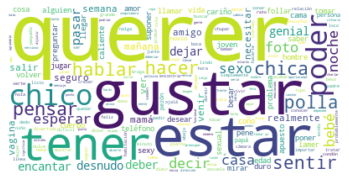

In [35]:
# generar una nube de palabras frecuentes
wcloud = WordCloud(background_color='white').generate_from_frequencies(frq_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
(-0.5,400,200,-0.5)
plt.show()
#wcloud.to_file('wordcloud1.png')

In [7]:
# Vectorización del texto
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
from spacy.lang.es.stop_words import STOP_WORDS

In [8]:
stopwords = list(STOP_WORDS)
warnings.filterwarnings("ignore")

In [9]:
tfidf = TfidfVectorizer(ngram_range=(2,3),stop_words=stopwords) #.fit(df['Text'].values)

In [10]:
clf = SVC(probability=True)

In [11]:
X, y = df['Text'].values, df['Groom'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [13]:
pipe = Pipeline([('tfidf',tfidf),('clf',clf)])

In [95]:
vect_text = tfidf.transform(df['Text'].values)

In [96]:
count_tokens = tfidf.get_feature_names()

In [97]:
df_tfidf = pd.DataFrame(data=vect_text.toarray(), columns=count_tokens)

In [127]:
df_tfidf.iloc[1185:1200, 10000:10010]

,personaje,personajes,personal,personales,personalidad,personalidades,personalizadas,personalizarán,personalmente,personas
1185,0.000000,0.172579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1186,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1187,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1188,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1189,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1190,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.381298
1191,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1192,0.000000,0.210092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1193,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1194,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [130]:
print("Mensaje original: ", df.Text.iloc[1190])
print("Mensjae transformado: ", tfidf.inverse_transform(vect_text[1190]))
print("Mensjae vectorizado: ", vect_text[1190])

Mensaje original:  Creo que fui una de las personas que encontré este otro de perlas podridas
Mensjae transformado:  [array(['podridas', 'personas', 'perlas', 'encontré'], dtype='<U28')]
Mensjae vectorizado:    (0, 10227)	0.5624930042396153
  (0, 10009)	0.38129782786865357
  (0, 9961)	0.586146069824958
  (0, 4868)	0.441187456159957


In [ ]:
#from sklearn.model_selection import GridSearchCV
#params = {'n_grams': [(1,2), (2,3)]}
#grid = GridSearchCV(clf, params, cv=5, scoring='accuracy')

In [14]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['dado', 'cuál', 'dice',
                                             'alrededor', 'tienen', 'ha',
                                             'habrá', 'llevar', 'estais',
                                             'explicó', 'además', 'quiere',
                                             'míos', 'estaban', 'intentais',
                                             'mías', 'ante', 'bueno',
                                             'temprano', 'sus', 'encuentra',
                                             'gran', 'nosotros', 'había',
                                             'consigo', 'podemos', 'hizo',
                                             'mencionó', 'teneis', 'sois', ...])),
                ('clf', SVC(probability=True))])

In [15]:
y_pred = pipe.predict(X_test)

In [43]:
print(y_test.shape, y_pred.shape)

(3400,) (3400,)


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1503
           1       0.83      0.88      0.86      1897

    accuracy                           0.84      3400
   macro avg       0.84      0.83      0.83      3400
weighted avg       0.84      0.84      0.84      3400



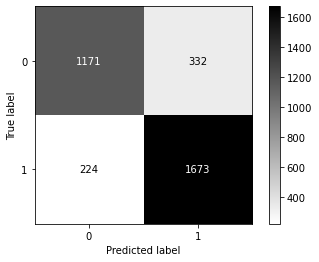

In [17]:
#%matplotlib inline
import matplotlib.pyplot as plt
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.binary)
plt.show()

In [46]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean())

0.782987210771334

In [47]:
from sklearn.model_selection import cross_val_predict
print(cross_val_predict(pipe, X_train, y_train, cv=5))

[0 0 1 ... 0 0 1]


In [18]:
print(f"Error absoluto medio [SVM]: {(mean_absolute_error(y_test.astype('int'), y_pred.astype('int'))*100).round(2)}%")
print(f"Puntaje R^2 [SVM]: {(r2_score(y_test.astype('int'), y_pred.astype('int'))*100).round(2)}%")

Error absoluto medio [SVM]: 16.35%
Puntaje R^2 [SVM]: 33.7%


In [19]:
print("Conjunto de datos:", df.shape, df['Groom'].shape)
print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de prueba:", X_test.shape, y_test.shape)

Conjunto de datos: (16999, 2) (16999,)
Conjunto de entrenamiento: (13599,) (13599,)
Conjunto de prueba: (3400,) (3400,)


In [20]:
print("Métricas de evaluación del modelo Suport Vector Machine:\n")
print(f"Exactitud: {(accuracy_score(y_test, y_pred)*100).round(2)}%")
print(f"Precisión: {(precision_score(y_test, y_pred)*100).round(2)}%")
print(f"Recuerdo: {(recall_score(y_test, y_pred)*100).round(2)}%")
print(f"Puntuación F1: {(f1_score(y_test, y_pred)*100).round(2)}%")
print(f"Perdida de clasificación: {(zero_one_loss(y_test, y_pred)*100).round(2)}%")

Métricas de evaluación del modelo Suport Vector Machine:

Exactitud: 83.65%
Precisión: 83.44%
Recuerdo: 88.19%
Puntuación F1: 85.75%
Perdida de clasificación: 16.35%


In [ ]:
y_pred_probSVM = pipe.predict_proba(X_test)[:,1]
print(f"Puntaje AUC [SVM]: {((roc_auc_score(y_test, y_pred_probSVM))*100).round(2)}%")
plot_roc_curve(pipe, X_test, y_test)
plt.title('SVM')
plt.show()

In [22]:
msg_prob = pipe.predict_proba(["Es un grandioso lugar y lo recomiendo mucho!"])
msg_pred = pipe.predict(["Es un grandioso lugar y lo recomiendo mucho!"])
print(f"El algoritmo SVM clasifica el mensaje como: {msg_pred[0]} con una confianza del {msg_prob[0][1]*100:.2f}% para No Groomer y {msg_prob[0][2]*100:.2f}% para Groomer")

El algoritmo SVM clasifica el mensaje como: 0 con una confianza del 97.92% para No Groomer y 2.05% para Groomer


In [23]:
print(f"{msg_prob[0][0]*100:.2f}")
print(f"{msg_prob[0][1]*100:.2f}")
print(f"{msg_prob[0][2]*100:.2f}")

0.03
97.92
2.05


In [24]:
msg_prob = pipe.predict_proba(["Me encantaría tener algunas fotos tuyas con la camisa desabotonada."])
msg_pred = pipe.predict(["Me encantaría tener algunas fotos tuyas con la camisa desabotonada."])
print(f"El algoritmo SVM clasifica el mensaje como: {msg_pred[0]} con una confianza del {msg_prob[0][1]*100:.2f}% para No Groomer y {msg_prob[0][2]*100:.2f}% para Groomer")

El algoritmo SVM clasifica el mensaje como: 1 con una confianza del 3.17% para No Groomer y 96.78% para Groomer


In [25]:
print(f"{msg_prob[0][0]*100:.2f}")
print(f"{msg_prob[0][1]*100:.2f}")
print(f"{msg_prob[0][2]*100:.2f}")

0.05
3.17
96.78


In [33]:
def groom_classifier(*msg):
    msg_pred = pipe.predict_proba(msg)
    if msg_pred[0][2]*100 > 80.0:
        print(f"El mensaje posee un {msg_pred[0][2]*100:.2f}% de posible contenido grooming!",)
    else:
        print(f"El mensaje posee un {msg_pred[0][2]*100:.2f}% de posible contenido grooming")

In [35]:
def new_groom_classifier(*msg):
    msg_pred = clf.predict_proba(msg)
    if msg_pred[0][2]*100 > 80.0:
        return msg_pred[0][2]*100
    else:
        pass

In [51]:
clf.predict_proba(['soy demasiado mayor para ti pero no me importaría cogerte.'])[0][2]*100

84.43383601925127

In [ ]:
import joblib
joblib.dump(pipe, 'GroomerClassifier.pkl')

['GroomerClassifier.pkl']

In [1]:
import joblib
clf = joblib.load('../GroomerClassifier.pkl')

In [2]:
import string
puncts = string.punctuation

In [100]:
print(clf.predict_proba(['Dale está bien, pero luego jugaremos fútbol.'])[0][2]*100)

13.580347524670684


In [3]:
import emoji
def delete_emojis(text):
    return emoji.get_emoji_regexp().sub(r'', text)

In [101]:
queue_groom = []
def check_groom(msg):
    msg = delete_emojis(msg)
    msg_prob = clf.predict_proba([msg])[0][2]*100
    print(type(msg_prob),msg_prob)
    print(type(queue_groom),queue_groom)
    while len(queue_groom) >= 12:
        groom_prom = sum(queue_groom)/len(queue_groom)
        print(type(groom_prom),groom_prom)
        if groom_prom > 80.0:
            return groom_prom
        else:
            return 0
    queue_groom.append(msg_prob)
    return 1

In [102]:
msg1, msg2, msg3 = "Te gustaría conocerme en persona?", "Puedo ver tu foto", "Simplemente me gusta estar desnudo"
msg4, msg5, msg6 = "entonces ¿Te gusta andar desnudo todo el tiempo?", "Cuantos años tienes?", "Tengo 35"
msg7, msg8, msg9 = "Que edades de chicas conoces?", "Igual que yo.", "Cuando crees que podamos vernos?"
msg10, msg11, msg12 = "Que harías cuando me desnude para ti", "No quiero meterme en problemas", "¿Podré ver alguna chica desnuda?"

In [115]:
check_groom(msg12)

<class 'numpy.float64'> 70.83443245551572
<class 'list'> [93.3322539417132, 98.54244028663615, 97.8144895872379, 93.77703870008416, 95.32211475350134, 95.31722835458424, 96.47276009649687, 95.31722835458424, 94.66416643972609, 95.31671897385948, 98.59235423606405, 94.42548101880804]
<class 'numpy.float64'> 95.74118956194131


95.74118956194131

In [346]:
niv_groom = []
def checkGroom(msg):
    try:
        text = delete_emojis(msg)
        while len(niv_groom) < 5:
            msg_groom_prob = clf.predict_proba([text])[0][2]*100
            niv_groom.append(msg_groom_prob)
            groom_prom = sum(niv_groom)/len(niv_groom)
            print(groom_prom, niv_groom)
            if groom_prom > 80.0:
                return groom_prom
            else:
                return -1
    except TypeError as te:
        raise(f"{te} \n Ocurrió un error en el tipo de dato: {type(msg)}")
    return 1

In [349]:
test = checkGroom("*")
print(type(test), test, sep='\t')

95.31722835458424 [95.31722835458424, 95.31722835458424, 95.31722835458424]
<class 'numpy.float64'>	95.31722835458424


In [303]:
import random
def rand_prom(n):
    void_list = []
    while len(void_list) < n:
        x = random.randint(0,10)
        void_list.append(x)
        print(x, void_list)
    prom = sum(void_list)/len(void_list)
    return prom

In [307]:
rand_prom(4)

6 [6]
4 [6, 4]
10 [6, 4, 10]
9 [6, 4, 10, 9]


7.25

In [222]:
from queue import PriorityQueue
pq = PriorityQueue()
pq.put('Hola')
pq.put('Como')
pq.put('estás')
pq.put('bebe')
pq.put('?')

while not pq.empty():
    item = pq.get()
    print(item)


?
Como
Hola
bebe
estás
